# 16. 여러 그래프 배치하기
---
### 서브플롯 (Subplots)
- 하나의 Figure에 여러 개의 그래프를 배치할 수 있다.
- 다양한 관점에서 데이터를 동시에 비교할 수 있다.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac 사용자
matplotlib.rcParams['font.size'] = 15 # 폰트 크기 설정
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


## 데이터 준비
### 고객 데이터 불러오기


In [2]:
# 고객 데이터 불러오기
df = pd.read_csv('../02_Pandas/data/customers3.csv', encoding='utf-8')
df.head()


,고객ID,고객명,나이,거주도시,주요관심사,최근1년_방문빈도,평균구매액(만원),고객만족도(점),재구매의사(점)
0,C001,박태근,35,시흥,Electronics,75,70,78,92
1,C002,이영희,30,안양,fashion,85,92,88,85
2,C003,박지성,35,울산,NaN,95,110,91,88
3,C004,최민아,40,창원,Fashion,92,105,82,96
4,C005,정수빈,28,구로,Fashion,82,88,94,79


## 서브플롯 만들기
### subplots() 함수
- **subplots(nrows, ncols)** 로 여러 그래프를 배치할 수 있다.
- **fig**: Figure 객체
- **axs**: Axes 객체들의 배열


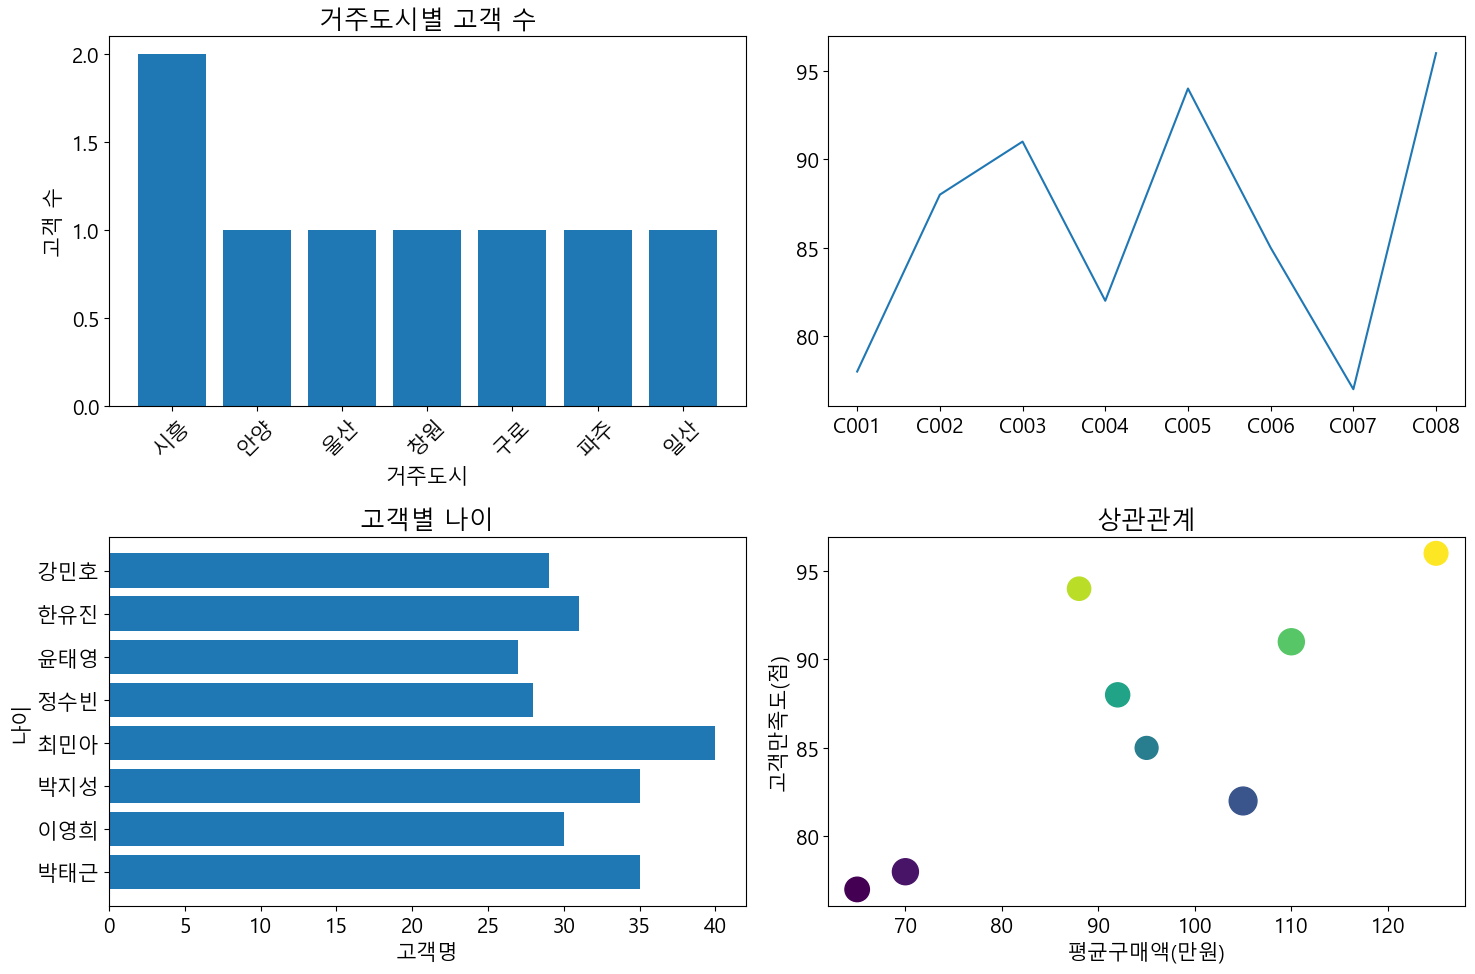

In [11]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

# 첫번째 그래프 0,0 거주도시별 고객수
city_counts = df['거주도시'].value_counts()  #거주도시별 고객 수
axs[0,0].bar(city_counts.index, city_counts.values)
axs[0,0].set_title('거주도시별 고객 수')
axs[0,0].set_xlabel('거주도시')
axs[0,0].set_ylabel('고객 수')
axs[0,0].tick_params(axis='x', rotation=45)

#두번째 그래프
axs[0,1].plot(df['고객ID'], df['고객만족도(점)'])

#세번째 그래프
axs[1,0].barh(df['고객명'], df['나이'])
axs[1,0].set_title('고객별 나이')
axs[1,0].set_xlabel('고객명')
axs[1,0].set_ylabel('나이')

#네번째 그래프
axs[1,1].scatter(df['평균구매액(만원)'], df['고객만족도(점)'],
                 s=df['나이']*10, c=df['고객만족도(점)'], cmap='viridis')
axs[1,1].set_title('상관관계')
axs[1,1].set_xlabel('평균구매액(만원)')
axs[1,1].set_ylabel('고객만족도(점)')

plt.tight_layout()

plt.show()

## Axes 객체 활용
### 각 서브플롯 스타일링
- 각 Axes 객체에 대해 개별적으로 스타일을 적용할 수 있다.
- **set_facecolor()**: 배경색 설정
- **grid()**: 그리드 추가
